# Рекомендация тарифов

<b>Цели проекта:</b>  
Построить модель с максимально большим значением accuracy.  
  
<b>Задачи проекта:</b>  
1. провести предобработку данных;
2. разбить данные на выборки;  
3. исследовать модели (будем решать задачу с учителем: в вашем распоряжении будет обучающий набор данных и целевой признак, который нужно предсказать по остальным признакам),
    - DecisionTreeClassifier,
    - RandomForestClassifier,
    - LogisticRegression;
4. проверить модель на тестовой выборке;  
5. сделать общие выводы.

<b>Данные:</b>  
Данные о поведении клиентов, которые уже перешли на тарифы «Смарт» или «Ультра».

<b>Описание данных</b>  
- <code>сalls</code> — количество звонков,
- <code>minutes</code> — суммарная длительность звонков в минутах, 
- <code>messages</code> — количество sms-сообщений,
- <code>mb_used</code> — израсходованный интернет-трафик в Мб,  
- <code>is_ultra</code> — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

<b>Содержание</b>
1. <a href="#first">Открытие файла с данными и изучение общей информации</a>  
2. <a href="#second">Разбивка данных на выборки</a>  
    2.1. <a href="#second-first">Обучающая выборка</a>  
    2.2. <a href="#second-second">Тестовая выборка</a>  
    2.3. <a href="#second-third">Валидационная выборка</a>  
3. <a href="#third">Исследование модели</a>  
    3.1. <a href="#third-first">DecisionTreeClassifier</a>  
    3.2. <a href="#third-second">RandomForestClassifier</a>  
    3.3. <a href="#third-third">LogisticRegression</a>  
4. <a href="#fourth">Проверка модели на тестовой выборке</a>  
5. <a href="#fifth">Общий вывод</a>  

## <a class="anchor" id="first">Откройте и изучите файл</a>

In [1]:
# импортировать библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# записать файл в data
try: 
    data = pd.read_csv('/datasets/users_behavior.csv', sep=',')
except:
    data = pd.read_csv('users_behavior.csv', sep=',')

In [3]:
# открыть файл
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
# изучить файл: метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропусков в данных не обнаружено.

Столбцы <code>calls</code>, <code>messages</code> в исходном датасете имеют тип <i>float</i>, хотя должно быть <i>int</i>, так как количество звонков и сообщений - целые числа.

In [5]:
data['calls'] = data['calls'].astype('int')
data['messages'] = data['messages'].astype('int')

Проверяем, что тип данных изменился на <i>int</i>.

In [6]:
# проверка: метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


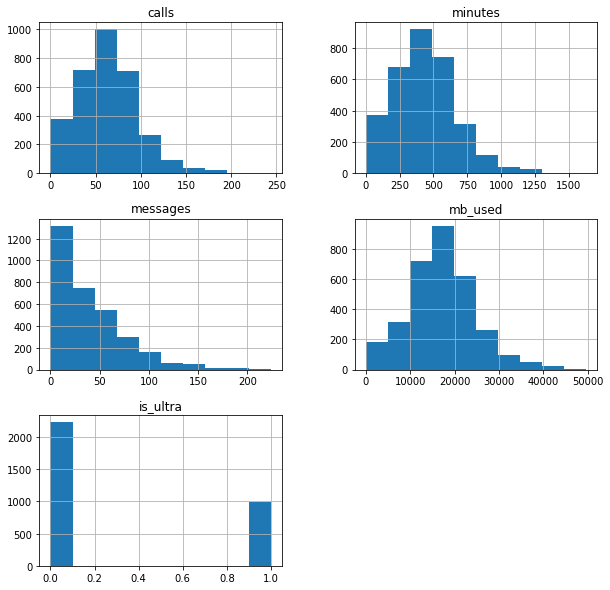

In [7]:
# изучить файл: гистограммы
data.hist(figsize=(10, 10));

In [8]:
# изучение данных: метод describe()
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Аномальных значений не обнаружено.

In [9]:
# определить размер data
data.shape

(3214, 5)

<b>ИТОГИ</b>
1. Импортирована библиотека pandas и открыт файл.
2. Изучен файл выводом первых 10 строк.
3. Изучен файл методом <i>info()</i>.
4. Построены гистограммы.  
  
Пропусков в данных не обноружено. Тип данных в <code>calls</code> и <code>messages</code> изменён на <i>int</i>. Аномальных значений в данных не найдено.  

## <a class="anchor" id="second">Разбейте данные на выборки</a>

Данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1.

### <a class="anchor" id="second-first">Обучающая выборка</a>

In [10]:
# создание обучающей выборки
df_test, df_train = train_test_split(data, test_size=0.6, random_state=12345)

In [11]:
# объявить переменные-признаки (переменные для признаков и целевого признака)
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

In [12]:
# размеры таблиц, которые хранятся в переменных
print(features_train.shape)
print(target_train.shape)

(1929, 4)
(1929,)


### <a class="anchor" id="second-second">Тестовая выборка</a>

In [13]:
# создание тестовой и валидационной выборок
df_valid, df_test = train_test_split(df_test, test_size=0.5, random_state=12345)

In [14]:
# объявить переменные-признаки (переменные для признаков и целевого признака)
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [15]:
# размеры таблиц, которые хранятся в переменных test
print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


### <a class="anchor" id="second-third">Валидационная выборка</a>

In [16]:
# объявить переменные-признаки (переменные для признаков и целевого признака)
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

In [17]:
# размеры таблиц, которые хранятся в переменных valid
print(features_valid.shape)
print(target_valid.shape)

(642, 4)
(642,)


<b>ИТОГИ</b>  
Данные были разбиты на три выборки: обучающая, тренировочная и валидационная в отношении 3:1:1 соответственно.

## <a class="anchor" id="third">Исследуйте модели</a>

### <a class="anchor" id="third-first">DecisionTreeClassifier</a>

In [18]:
# DecisionTreeClassifier
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучить модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучить модель
    predictions = model.predict(features_valid) # получить предсказания модели
    result = accuracy_score(target_valid, predictions) # посчитать качество модели
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

In [19]:
# вывести результаты
print('accuracy лучшей модели:', best_result)
print('depth лучшей модели:', best_depth)

accuracy лучшей модели: 0.780373831775701
depth лучшей модели: 4


<b>Вывод:</b> accuracy лучшей модели = 0.780373831775701 при глубине 4.

### <a class="anchor" id="third-second">RandomForestClassifier</a>

In [20]:
# RandomForestClassifier
best_model = None
best_result = 0
best_depth = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

In [21]:
# вывести результаты
print('accuracy лучшей модели:', best_result)
print('depth лучшей модели:', best_depth)

accuracy лучшей модели: 0.7975077881619937
depth лучшей модели: 10


<b>Вывод:</b> accuracy лучшей модели = 0.7975077881619937 при глубине 10.

### <a class="anchor" id="third-third">LogisticRegression</a>

In [22]:
# LogisticRegression
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = accuracy_score(predictions, target_valid)

In [23]:
# вывести результаты
print('Accuracy лучшей модели:', accuracy)

Accuracy лучшей модели: 0.7258566978193146


<b>Вывод:</b> accuracy лучшей модели = 0.7258566978193146.

<b>ИТОГИ</b>  
Было исследовано качество разных моделей при изменении гиперпараметров.  
Наилучший результат по accuracy показал RandomForestClassifier (0.7975077881619937).

## <a class="anchor" id="fouth">Проверьте модель на тестовой выборке</a>

Так как наилучший результат был у модели RandomForestClassifier, то проверим его на тестовой выборке.

In [24]:
# проверка RandomForestClassifier на тестовой выборке
model = RandomForestClassifier(random_state=12345, n_estimators = 10, max_depth = 10)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
result = accuracy_score(predictions, target_test)

In [25]:
# вывести результаты
print('accuracy на тестовой выборке:', result)

accuracy на тестовой выборке: 0.8087091757387247


<b>Вывод:</b> accuracy (доля правильных ответов) на тестовой выборке больше 0.75.

## <a class="anchor" id="fifth">Общие выводы</a>

1. <b>Изучен файл</b>  
    - Пропусков в данных не обноружено.  
    - Тип данных в <code>calls</code> и <code>messages</code> изменён на <i>int</i>.  
    - Аномальных значений в данных не найдено.  
2. <b>Данные разбиты на выборки</b> 
    - Данные были разбиты на три выборки: обучающая, тренировочная и валидационная в отношении 3:1:1 соответственно.  
3. <b>Исследованы модели</b> 
    - DecisionTreeClassifier: accuracy лучшей модели = 0.780373831775701 при глубине 4.
    - RandomForestClassifier: accuracy лучшей модели = 0.7975077881619937 при глубине 10.  
    - LogisticRegression: accuracy лучшей модели = 0.7258566978193146.
4. <b>Проверена модель на тестовой выборке</b>